# COMP90084 Workshop Week 6
In this week we'll mainly focus on programming the Deutsch-Jozsa algorithm.

In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, QuantumRegister, ClassicalRegister
from qiskit.circuit import Gate
from qiskit.tools.jupyter import *
from qiskit.visualization import *
import matplotlib.pyplot as plt
from qiskit.quantum_info import partial_trace, DensityMatrix, Statevector
%matplotlib inline
# shots simulation
backend_sim = Aer.get_backend('qasm_simulator')
# statevector
backend_sv = Aer.get_backend('statevector_simulator')

## 1-Qubit (Deutsch's Algorithm)

In [2]:
# define the constant and balanced functions
def constant_function_1():
    qc = QuantumCircuit(2, name="constant1")
    return qc

def constant_function_2():
    qc = QuantumCircuit(2, name="constant2")
    qc.x(1)
    return qc


def balanced_function_1():
    qc = QuantumCircuit(2, name="balanced1")
    qc.cx(0, 1)
    return qc

def balanced_function_2():
    qc = QuantumCircuit(2, name="balanced2")
    qc.cx(0, 1)
    qc.x(1)
    return qc

Draw the constant and balanced functions

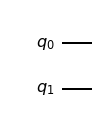

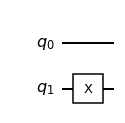

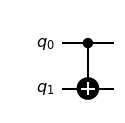

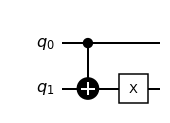

In [3]:
const_1 = constant_function_1()
const_2 = constant_function_2()
balan_1 = balanced_function_1()
balan_2 = balanced_function_2()
display(const_1.draw('mpl',style="bw", scale = 1))
display(const_2.draw('mpl',style="bw", scale = 1))
display(balan_1.draw('mpl',style="bw", scale = 1))
display(balan_2.draw('mpl',style="bw", scale = 1))

In [1]:
# define the Deutsch-Jozsa function
def deutsch_josza(function=None, num_qubits = 2):
    x = QuantumRegister(num_qubits-1, "x")
    y = QuantumRegister(1, "y")
    cr = ClassicalRegister(num_qubits-1, "meas")
    qc = QuantumCircuit(x, y, cr)
    # X gate on the function output qubit
    qc.x(y)
    qc.barrier()
    # H gate everywhere
    qc.h([*x, *y])
    qc.barrier()
    # append the function
    if function is None:
        f = Gate(name='placeholder', num_qubits=num_qubits, params=[])
        qc.append(f, list(range(num_qubits)))
        qc.barrier()
    else:
        f = function.to_instruction()
        qc.append(f, list(range(num_qubits)))
        qc.barrier()
    qc.h(x)
    qc.barrier()
    qc.measure(x, cr)
    return qc

In [2]:
# just create a circuit with an empty function slot
dj_example = deutsch_josza(num_qubits=6)
dj_example.draw('mpl',style="bw", scale = 1.5)

NameError: name 'QuantumRegister' is not defined

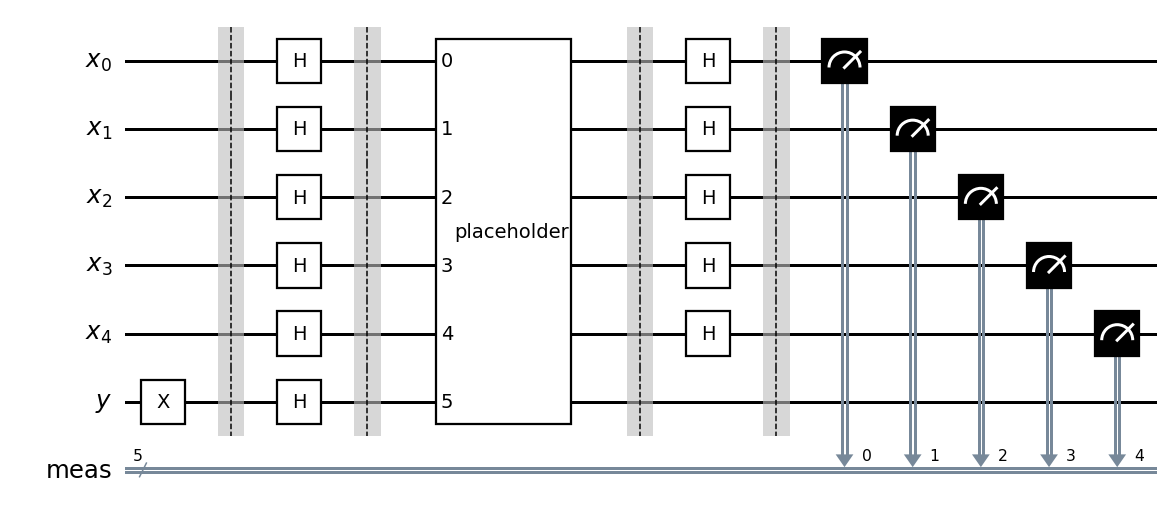

In [5]:
# just create a circuit with an empty function slot
dj_example = deutsch_josza(num_qubits=6)
dj_example.draw('mpl',style="bw", scale = 1.5)

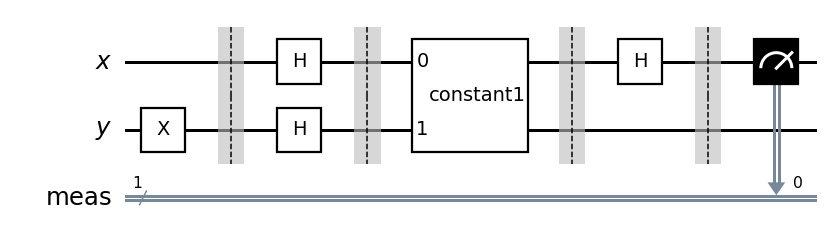

{'0': 2048}


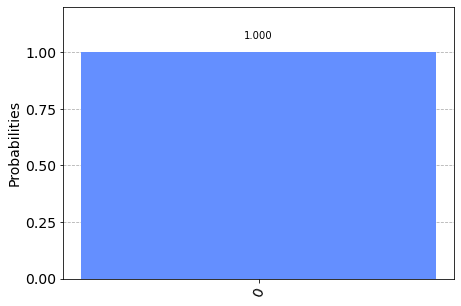

In [9]:
# insert the constant/balanced functions defined previouly
dj_1_qubit = deutsch_josza(const_1, 2)
job_dj_1_qubit = backend_sim.run(transpile(dj_1_qubit, backend_sim), shots=2048)
result_dj_1_qubit = job_dj_1_qubit.result()
counts_dj_1_qubit = result_dj_1_qubit.get_counts(dj_1_qubit)
display(dj_1_qubit.draw('mpl',style="bw", scale = 1.5))
print(counts_dj_1_qubit)
plot_histogram(counts_dj_1_qubit)

## Multi-Qubit Deutsch-Jozsa

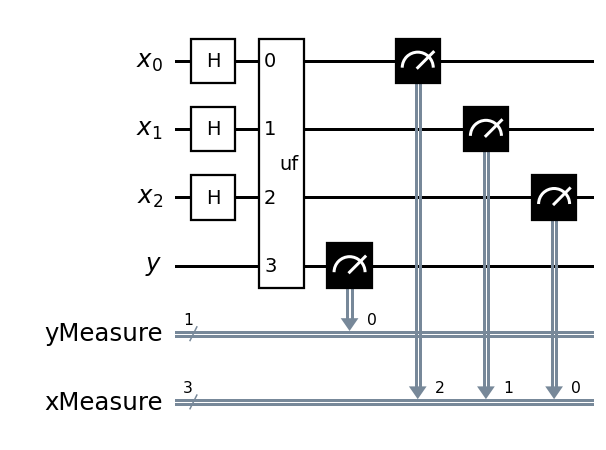

{'010 1': 513, '011 0': 503, '001 1': 531, '000 0': 516, '110 1': 517, '100 1': 490, '101 0': 512, '111 0': 514}


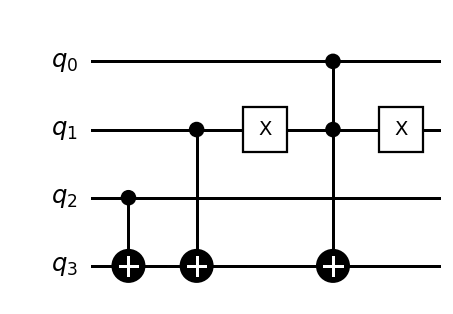

In [7]:
# define the function to be checked
def Uf():
    # a four-qubit function
    qc = QuantumCircuit(4, name="uf")
    qc.cx(2,3)
    qc.cx(1,3)
    qc.x(1)
    qc.ccx(0,1,3)
    qc.x(1)
    return qc

# print all the possible input/output of the function U_f
Uf_input = QuantumRegister(3, "x")
Uf_output = QuantumRegister(1, "y")
Uf_input_measure = ClassicalRegister(3, "xMeasure")
Uf_output_measure = ClassicalRegister(1, "yMeasure")
Ufcircuit = QuantumCircuit(Uf_input, Uf_output, Uf_output_measure, Uf_input_measure,)
Ufcircuit.h(Uf_input)
Ufcircuit.append(Uf(), [0,1,2,3])
Ufcircuit.measure(Uf_output, Uf_output_measure)
for i in range(3):
    Ufcircuit.measure(Uf_input[i], Uf_input_measure[3-1-i])

job = backend_sim.run(transpile(Ufcircuit, backend_sim), shots=4096)
result = job.result()
counts = result.get_counts(Ufcircuit)
display(Ufcircuit.draw('mpl',style="bw", scale = 1.5))
print(counts)
plot_histogram(counts)
display(Uf().draw('mpl',style="bw", scale = 1.5))

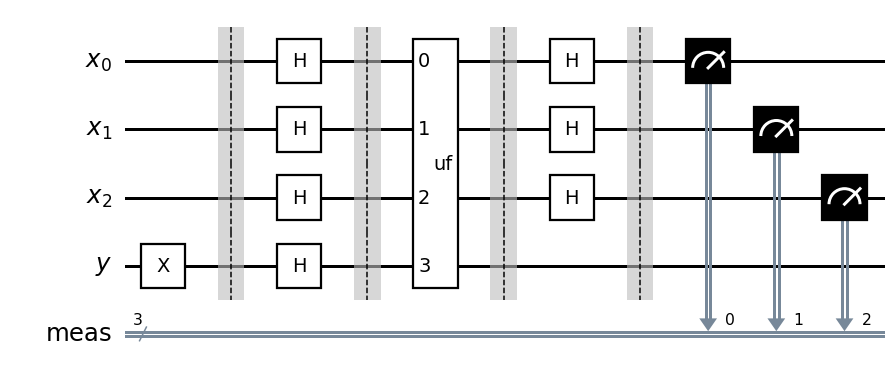

{'101': 533, '111': 489, '110': 531, '100': 495}


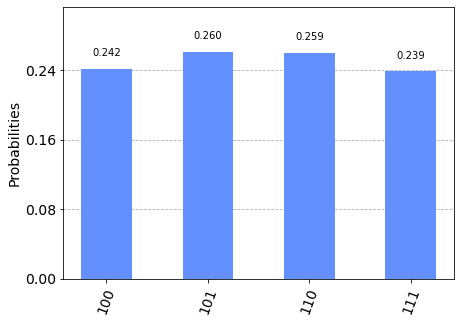

In [8]:
dj_4_qubit = deutsch_josza(Uf(), num_qubits=4)
job = backend_sim.run(transpile(dj_4_qubit, backend_sim), shots=2048)
result = job.result()
counts = result.get_counts(dj_4_qubit)
display(dj_4_qubit.draw('mpl',style="bw", scale = 1.5))
print(counts)
plot_histogram(counts)

#### Online tutorial recording
https://unimelb.zoom.us/rec/share/cxD_jN6iz-Y8DnNIqW5opi34BRw4A60IVvPG16wSoLHIEUdXWmLRa06z8AvAUC1N.J2l8lmBDgQC_0Qco 

Passcode: 2W?t?218